In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber_merge = pd.merge(ride_data, city_data, on=["city", "city"], how="left")
pyber_merge_df = pd.DataFrame(pyber_merge)

pyber_merge["fare"] = pd.to_numeric(pyber_merge["fare"])

# Display the data table for preview
pyber_merge.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

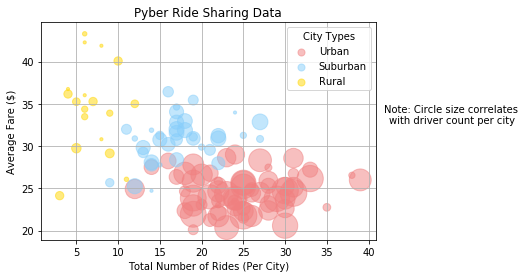

In [25]:
# # Obtain the x and y coordinates for each of the three city types
urban_df = pyber_merge.loc[pyber_merge["type"] == "Urban", :]
urban_ride_count = urban_df.groupby(["city"]).count()["ride_id"]
urban_fares = urban_df.groupby(["city"])["fare"].sum()/urban_ride_count
urban_drivers = urban_df.groupby(["city"])["driver_count"].mean()

suburban_df = pyber_merge.loc[pyber_merge["type"] == "Suburban", :]
suburban_ride_count = suburban_df.groupby(["city"]).count()["ride_id"]
suburban_fares = suburban_df.groupby(["city"])["fare"].sum()/suburban_ride_count
suburban_drivers = suburban_df.groupby(["city"])["driver_count"].mean()

rural_df = pyber_merge.loc[pyber_merge["type"] == "Rural", :]
rural_ride_count = rural_df.groupby(["city"])["ride_id"].count()
rural_fares = rural_df.groupby(["city"])["fare"].sum()/rural_ride_count
rural_drivers = rural_df.groupby(["city"])["driver_count"].mean()

# # Build the scatter plots for each city types
plt.scatter(urban_ride_count, urban_fares, marker="o", s=urban_drivers*10, facecolors="lightcoral", edgecolors="lightcoral", alpha=0.5, label="Urban")
plt.scatter(suburban_ride_count, suburban_fares, marker="o", s=suburban_drivers*10, facecolors="lightskyblue", edgecolors="lightskyblue", alpha=0.5, label="Suburban")
plt.scatter(rural_ride_count, rural_fares, marker="o", s=rural_drivers*10, facecolors="gold", edgecolors="gold", alpha=0.5, label="Rural")

# # Incorporate the other graph properties
plt.grid(True)
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data")

# # Create a legend

lgnd = plt.legend(loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [50]
lgnd.legendHandles[1]._sizes = [50]
lgnd.legendHandles[2]._sizes = [50]

# # Incorporate a text label regarding circle size
plt.text(50,35, "Note: Circle size correlates \nwith driver count per city", ha="center", va="top")


# Save Figure
plt.savefig("Images/ride_sharing_bubble_plot.png", bbox_inches="tight")

In [8]:
# Show plot
plt.show()

Limitations:
1. These graphs do not take into account: unique riders, unique drivers, population of the cities, average car ownership, availability of mass transit, availability of cellular service, or ownership/use of smartphones, among other relevant data points. 

Observations:
1. Assuming fares are calculated in the same way (i.e. flat rate per mile or that rate changes are applied equally), urban riders tend to take shorter rides, while rural riders take longer rides. This could be due to the lower density and greater sprawl of rural areas. 

## Total Fares by City Type

<function matplotlib.pyplot.show(*args, **kw)>

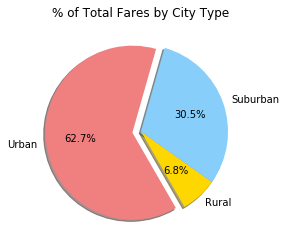

In [334]:
# Calculate Type Percents
city_type_fare = pyber_merge.groupby(["type"])["fare"].sum()
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
labels = ["Rural", "Suburban", "Urban"]

#Build Pie Chart
plt.title("% of Total Fares by City Type")
plt.pie(city_type_fare, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=300)

# Save Figure
plt.savefig("Images/total_fares_by_city_type.png")
plt.show

In [335]:
# Show Figure
plt.show()

## Total Rides by City Type

([<matplotlib.patches.Wedge at 0x186149f3eb8>,
 [Text(1.0301623657919177, -0.38570130944294095, 'Rural'),
  Text(0.8863415953607173, 0.6514588063211816, 'Suburban'),
  Text(-1.0707050316062863, -0.5418401381339166, 'Urban')],
 [Text(0.5619067449774096, -0.2103825324234223, '5.3%'),
  Text(0.48345905201493666, 0.3553411670842808, '26.3%'),
  Text(-0.6245779351036669, -0.31607341391145133, '68.4%')])

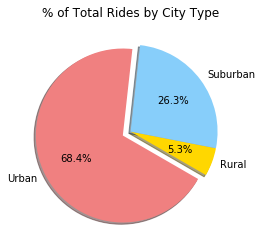

In [336]:
# Calculate Ride Percents
city_rides = pyber_merge.groupby(["type"])["fare"].count()
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
labels = ["Rural", "Suburban", "Urban"]

#Build Pie Chart
plt.title("% of Total Rides by City Type")
plt.pie(city_rides, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=330)

# Save Figure
plt.savefig("../Images/total_rides_by_city_type.png")

In [71]:
# Show Figure
plt.show()

Observations:
2. City-for-city, there are substantially more rides taken in urban areas than suburban and rural combined. Given the limitations listed above, it is difficult to surmise why this might be the case. 

## Total Drivers by City Type

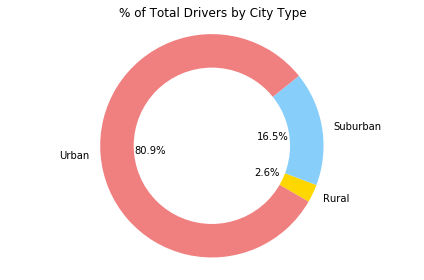

In [355]:
# Calculate Type Percents
drivers_by_city = city_data.groupby(["type"])["driver_count"].sum()
explode = (0.1, 0.1, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
labels = ["Rural", "Suburban", "Urban"]

#Build Pie Charts
plt.title("% of Total Drivers by City Type")
plt.pie(drivers_by_city, labels=labels, colors=colors, pctdistance=0.55, autopct="%1.1f%%", startangle=330)

#Make it a donut to lower the ink ratio.
center_circle = plt.Circle((0,0),0.70, fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.axis("equal")
plt.tight_layout()
# Save Figure
plt.savefig("Images/total_drivers_by_city_type.png")

In [73]:
# Show Figure
plt.show()

Observations:
3. Most drivers operate in urban areas. Since the percent of rides doesn't correlate to this, that suggests that generally urban drivers log fewer rides. 
4. Looking at the Ratio DataFrame below, on average rural drivers bring in more than twice as much in fares as durban drivers, which suggests a saturation in the urban market. 

In [365]:
sum_fare = pyber_merge.groupby(["type"])["fare"].sum()

ride_to_driver_ratio = round(city_rides/drivers_by_city,2)
fare_to_driver_ratio = round(sum_fare/drivers_by_city, 2)

ratio_df = ride_to_driver_ratio.to_frame(name="Ride/Driver Ratio").join(fare_to_driver_ratio.to_frame(name="Fare/Driver Ratio"))
ratio_df

,Ride/Driver Ratio,Fare/Driver Ratio
type,,
Rural,1.60,55.49
Suburban,1.28,39.50
Urban,0.68,16.57
